In [36]:
#Read the dataset to the python environment
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data=pd.read_csv("Wine.csv")

In [37]:
data

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [38]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [43]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

# KMeans Clustering

In [44]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

C:\Users\Jibin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Text(0, 0.5, 'WCSS')

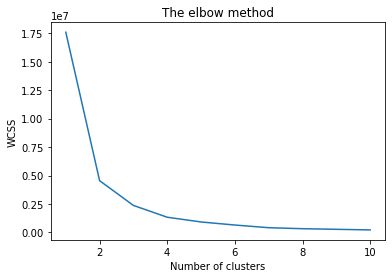

In [45]:
#optimum number of clusters
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

In [46]:
cluster_Kmeans = KMeans(n_clusters=5)
model_kmeans = cluster_Kmeans.fit(X)
pred = model_kmeans.labels_
pred

array([2, 2, 2, 1, 4, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 4, 4, 4,
       2, 2, 4, 4, 2, 1, 4, 2, 1, 1, 2, 1, 2, 4, 4, 2, 2, 4, 4, 2, 2, 0,
       4, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 1, 3, 0, 3, 0, 3, 3, 0,
       3, 3, 4, 0, 4, 3, 3, 2, 4, 3, 3, 3, 4, 3, 3, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 3, 3, 3, 3, 3, 4, 0, 3, 0, 3, 0, 0, 3, 3, 0, 3, 3, 3, 3, 0,
       0, 3, 0, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3,
       0, 0, 0, 0, 0, 3, 0, 0, 0, 4, 3, 0, 4, 4, 3, 0, 0, 0, 3, 3, 3, 0,
       0, 0, 3, 4, 0, 0, 3, 0, 0, 0, 0, 3, 0, 0, 4, 0, 3, 3, 0, 4, 4, 4,
       4, 0])

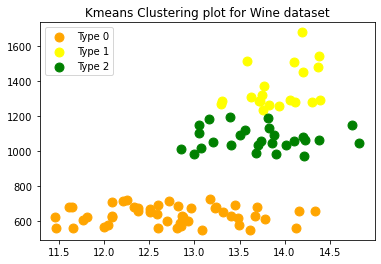

In [47]:
plt.scatter(X[pred == 0, 0], X[pred == 0, 12], s = 80, c = 'orange', label = 'Type 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 12], s = 80, c = 'yellow', label = 'Type 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 12], s = 80, c = 'green', label = 'Type 2')

plt.title('Kmeans Clustering plot for Wine dataset')
plt.legend()

# Hierarchical clustering

In [48]:
from sklearn.cluster import AgglomerativeClustering

In [49]:
import scipy.cluster.hierarchy as sch

Text(0, 0.5, ' distance in the space with other variables')

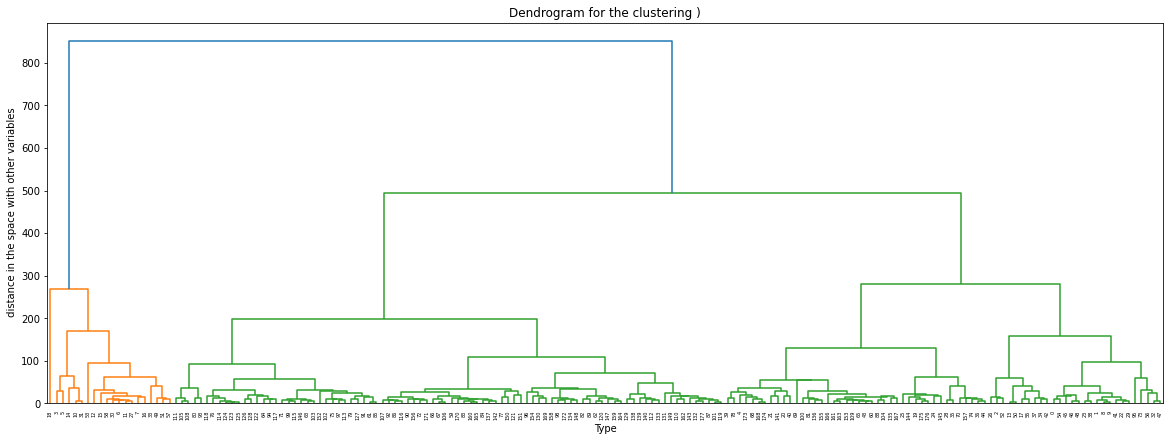

In [50]:
#decide optimum number of clusters
Z = sch.linkage(X, method = 'median')
plt.figure(figsize=(20,7))
den = sch.dendrogram(Z)
plt.title('Dendrogram for the clustering )')
plt.xlabel('Type')
plt.ylabel(' distance in the space with other variables')

In [51]:
#Agglomerative Clustering Model
cluster_H = AgglomerativeClustering(n_clusters=3)
model_clt = cluster_H.fit(X)
model_clt
pred1 = model_clt.labels_
pred1

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2,
       2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1], dtype=int64)

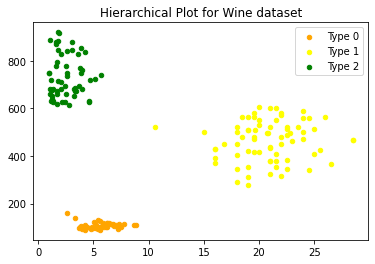

In [52]:
#plot
plt.scatter(X[pred1 == 0, 9], X[pred1 == 0, 4], s = 20, c = 'orange', label = 'Type 0')
plt.scatter(X[pred1 == 1, 3], X[pred1 == 1, 12], s = 20, c = 'yellow', label = 'Type 1')
plt.scatter(X[pred1 == 2, 1], X[pred1 == 2, 12], s = 20, c = 'green', label = 'Type 2')
plt.title('Hierarchical Plot for Wine dataset')
plt.legend()

evaluation metrics


In [53]:
from sklearn.metrics import silhouette_score

In [54]:
#kmeans clustering
silhouette_avg1=silhouette_score(X,pred)
print(silhouette_avg1)

0.5489993239795681


In [55]:
#hierarchical clustering
silhouette_avg2=silhouette_score(X,pred1)
print(silhouette_avg2)

0.5644796401732071
